In [2]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt

### Changing the image from png to numpy array

In [3]:
# X_max and y_max can be made smaller to visualize more enlarged correlations

img = corr.png_to_numpy('data/time_048.png', 200, x_min=120, x_max=300, y_min=200, y_max=380)

## Visualizing the microstructure(cropped)

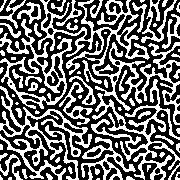

In [4]:
Image.fromarray(img)

## Binarize array

In [5]:
img_binary = corr.binarize_image(img)

# Correlation plots obtained by using PYMKS library

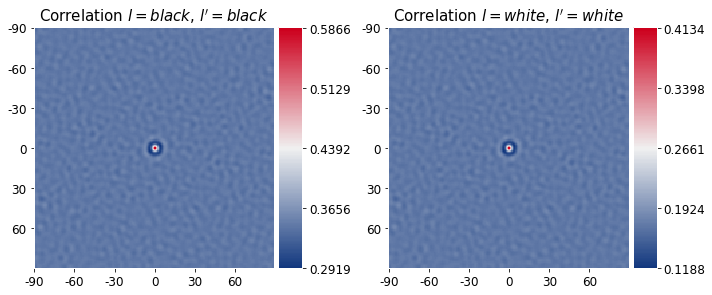

1

In [6]:
# Auto Correlation

corr.auto_corr_from_pymks(img_binary)

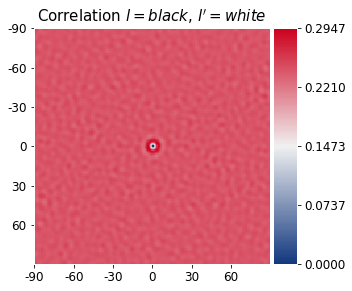

1

In [7]:
# Cross Correlation

corr.cross_corr_from_pymks(img_binary)

# Plots obtained by self built CODE

white region : 


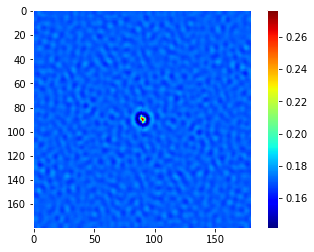

black region : 


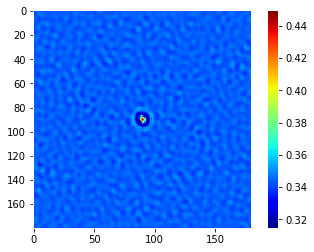

In [8]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_binary)

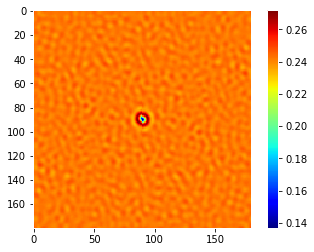

In [9]:
# Cross Correlations

cross = corr.cross_corr_from_code(img_binary)